# Import required libraries

In [75]:
import os
import numpy as np
import matplotlib.pyplot as plt
from experiments.CarOnHill.plot_utils import plot_on_grid, plot_value
BASE_PATH = "logs/"
NX, NV = 17, 17

# Hyperparameter setting for generating the plots

In [80]:
# Set these value before running the cells below
experiments_to_run = ['test/FQI']
# Set these value to True if you want to generate these plots
PLOT_SAMPLES_DISTRIBUTION = True
PLOT_TD_ERROR_ON_RB_DATA = True
PLOT_TD_ERROR_ON_GRID = True
PLOT_DIFF_FROM_OPT_Q = True
PLOT_DIFF_FROM_OPT_V = True
PLOT_PERFORMANCE_LOSS_Q = False
PLOT_PERFORMANCE_LOSS_V= False
BELLMAN_ITERATIONS_FOR_POLICY_PLOT = []
if PLOT_DIFF_FROM_OPT_Q or PLOT_PERFORMANCE_LOSS_Q:
    OPT_Q = np.load(os.path.join(BASE_PATH, "Q*_nx=17_nv=17.npy"))
if PLOT_DIFF_FROM_OPT_V or PLOT_PERFORMANCE_LOSS_V:
    OPT_V = np.load(os.path.join(BASE_PATH, "V*_nx=17_nv=17.npy"))

# Check and load all the relevant metrics for plotting

In [81]:
experiment_seed_folder_map = {experiment: [seed_run
            for seed_run in os.listdir(os.path.join(BASE_PATH, experiment))
            if not os.path.isfile(os.path.join(BASE_PATH,experiment, seed_run))] for experiment in experiments_to_run}
assert all([os.path.exists(os.path.join(BASE_PATH, experiment_folder_path)) for experiment_folder_path in experiment_seed_folder_map]), "Found experiments with no corresponing folders"
metrics = {}
for experiment in experiment_seed_folder_map:
    metrics[experiment] = {}
    if PLOT_SAMPLES_DISTRIBUTION:
        metrics[experiment].setdefault("samples_distribution",  np.load(os.path.join(BASE_PATH, experiment, "samples_stats.npy"))) 
        metrics[experiment].setdefault("rewards_distribution", np.load(os.path.join(BASE_PATH, experiment, "rewards_stats.npy")))
    if PLOT_TD_ERROR_ON_GRID or PLOT_DIFF_FROM_OPT_Q or PLOT_DIFF_FROM_OPT_V or PLOT_PERFORMANCE_LOSS_Q or PLOT_PERFORMANCE_LOSS_V:
        metrics[experiment].setdefault("samples_distribution",  np.load(os.path.join(BASE_PATH, experiment, "samples_stats.npy")))
        metrics[experiment].setdefault("scaling",  metrics[experiment]["samples_distribution"]/metrics[experiment]["samples_distribution"].sum())
    if PLOT_TD_ERROR_ON_RB_DATA:
        metrics[experiment].setdefault("T_q_rb", {seed_run: np.load(os.path.join(BASE_PATH, experiment, seed_run, "T_q_rb.npy")) for seed_run in experiment_seed_folder_map[experiment]})
        metrics[experiment].setdefault("q_i_rb", {seed_run: np.load(os.path.join(BASE_PATH, experiment, seed_run, "q_i_rb.npy")) for seed_run in experiment_seed_folder_map[experiment]})
    if PLOT_TD_ERROR_ON_GRID:
        metrics[experiment].setdefault("T_q_grid", {seed_run: np.load(os.path.join(BASE_PATH, experiment, seed_run, "T_q_grid.npy")) for seed_run in experiment_seed_folder_map[experiment]})
        metrics[experiment].setdefault("q_i_grid", {seed_run: np.load(os.path.join(BASE_PATH, experiment, seed_run, "q_i_grid.npy")) for seed_run in experiment_seed_folder_map[experiment]})
    if PLOT_DIFF_FROM_OPT_Q or PLOT_DIFF_FROM_OPT_V:
        metrics[experiment].setdefault("q_i_grid", {seed_run: np.load(os.path.join(BASE_PATH, experiment, seed_run, "q_i_rb.npy")) for seed_run in experiment_seed_folder_map[experiment]})
    
    if len(BELLMAN_ITERATIONS_FOR_POLICY_PLOT) > 0:
        metrics[experiment].setdefault(f"q_i_grid", {seed_run: np.load(os.path.join(BASE_PATH, experiment, seed_run, "q_i_grid.npy")) for seed_run in experiment_seed_folder_map[experiment]})

## Plot samples distribution 
Run this cell only if `PLOT_SAMPLES_DISTRIBUTION=True`

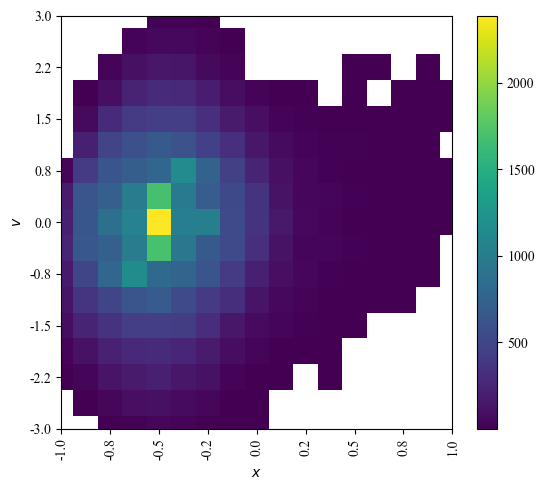

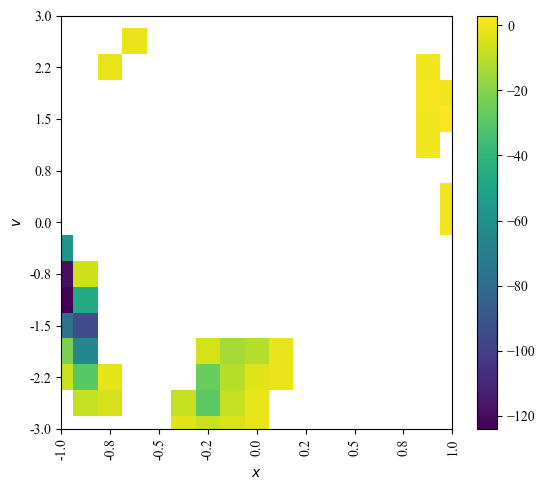

In [77]:
for experiment in experiment_seed_folder_map:
    plot_on_grid(metrics[experiment]["samples_distribution"], NX, NV, True).savefig(os.path.join(BASE_PATH, experiment, "samples_distribution.pdf"))
    plot_on_grid(metrics[experiment]["rewards_distribution"], NX, NV, True).savefig(os.path.join(BASE_PATH, experiment, "rewards_distribution.pdf"))

## Plot $||\Gamma Q_{i-1} - Q_i||_2$ on replay buffer data
Run this cell only if `PLOT_TD_ERROR_ON_RB_DATA=True`

In [86]:
td_error_on_rb = {}
for experiment in experiment_seed_folder_map:
    n_seeds = len(metrics[experiment]["q_i_grid"])
    print(metrics[experiment]["q_i_grid"]["seed=10"])
    n_bellman_iterations = list(metrics[experiment]["T_q_rb"].values())[0].shape[0]
    td_error_on_rb[experiment] = np.zeros(n_seeds, n_bellman_iterations)
    for idx_seed, seed_run in enumerate(experiment_seed_folder_map[experiment]):
        td_error_on_rb[experiment][idx_seed] = (metrics[experiment]["T_q_rb"][seed_run] - metrics[experiment]["q_i_rb"][seed_run]).mean(axis=(1,2))

[[0.08765552 0.10024145 0.11140372 ... 0.0781333  0.07649068 0.07465616]
 [0.10276048 0.10564074 0.12964194 ... 0.0827085  0.09180661 0.09444156]
 [0.11250113 0.13173622 0.15337755 ... 0.08252079 0.09596668 0.08845297]
 ...
 [0.44054201 0.54646999 0.68269086 ... 0.19021873 0.24319471 0.36665452]
 [0.52285409 0.65684319 0.84802306 ... 0.24554525 0.27363873 0.43194935]
 [0.60941511 0.78994179 0.9403643  ... 0.32537541 0.31585082 0.46787155]]


TypeError: Cannot interpret '29' as a data type

## Plot $||\Gamma Q_{i-1} - Q_i||_2$ on grid
Run this cell only if `PLOT_TD_ERROR_ON_GRID=True`

In [87]:
td_error_on_rb = {}
for experiment in experiment_seed_folder_map:
    n_seeds = len(metrics[experiment]["q_i_grid"])
    print(metrics[experiment]["q_i_grid"]["seed=10"])
    n_bellman_iterations = list(metrics[experiment]["T_q_grid"].values())[0].shape[0]
    td_error_on_rb[experiment] = np.zeros(n_seeds, n_bellman_iterations)
    for idx_seed, seed_run in enumerate(experiment_seed_folder_map[experiment]):
        td_error_on_rb[experiment][idx_seed] = (metrics[experiment]["T_q_grid"][seed_run] - metrics[experiment]["q_i_grid"][seed_run]).mean(axis=(1,2))

SyntaxError: invalid syntax (617396682.py, line 2)

## Plot $||Q^{*} - Q_i||_2$
Run this cell only if `PLOT_DIFF_FROM_OPT_Q=True`

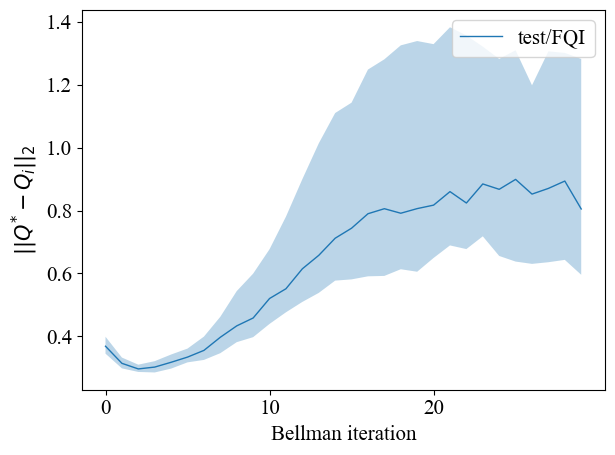

In [95]:
q_opt_diff = {}
for experiment in experiment_seed_folder_map:
    n_seeds = len(metrics[experiment]["q_i_grid"])
    n_bellman_iterations = list(metrics[experiment]["q_i_grid"].values())[0].shape[0]
    q_opt_diff[experiment] = np.zeros((n_seeds, n_bellman_iterations))
    for idx_seed, seed_run in enumerate(experiment_seed_folder_map[experiment]):
        q_opt_diff[experiment][idx_seed] = np.square(OPT_Q.reshape(-1,2) - metrics[experiment]["q_i_grid"][seed_run]).mean(axis=(1,2))
plot_value("Bellman iteration", "$||Q^{*} - Q_i||_2$", range(n_bellman_iterations), q_opt_diff, ticksize=10).savefig(os.path.join(BASE_PATH, experiments_to_run[0], "q_i_opt_diff.pdf"))